In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('gamesDataSet_original.csv')
data.head()

C:\Users\recurso\.conda\envs\Master\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Add-on,GameTittle,Genre,Platforms,Published by,Released,Platform,Developed by,Gameplay,Official Site,...,Pacing,Special Edition,ESRB Rating,Interface,Misc,Visual,Art,Sport,Educational,Amazon Rating
0,Customization / outfit / skin,Dead Space: Pedestrian Pack,DLC / add-on,"PlayStation 3, Xbox 360","Electronic Arts, Inc.","Nov 13, 2008",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Customization / outfit / skin, Item",Dead Space: Scorpion Pack,"Compilation, DLC / add-on","PlayStation 3, Xbox 360","Electronic Arts, Inc.","Nov 13, 2008",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Customization / outfit / skin,Dead Space: Scorpion Suit,DLC / add-on,"PlayStation 3, Xbox 360","Electronic Arts, Inc.","Oct 09, 2008",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Item,Dead Space: Scorpion Weapon Pack,DLC / add-on,"PlayStation 3, Xbox 360","Electronic Arts, Inc.","Nov 13, 2008",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Item,Dead Space: Speed Kills Pack,DLC / add-on,"PlayStation 3, Xbox 360","Electronic Arts, Inc.","Nov 13, 2008",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = data[data['Add-on'].isnull()]
data.isnull().sum()  / data.shape[0] * 100

Add-on             100.000000
GameTittle           0.001127
Genre                0.075521
Platforms           57.196479
Published by         7.589301
Released             0.001127
Platform            42.805776
Developed by        24.775409
Gameplay            35.691018
Official Site       78.544135
Perspective         21.868413
Setting             65.796860
Vehicular           90.158594
Narrative           88.064294
Pacing              83.246728
Special Edition     97.235028
ESRB Rating         89.509339
Interface           75.461298
Misc                87.663018
Visual              67.619509
Art                 91.313953
Sport               93.365420
Educational         96.832625
Amazon Rating       99.997746
dtype: float64

In [4]:
data = data[['GameTittle','Genre','Platforms','Published by','Released','Platform','Developed by','Gameplay','Perspective']]

In [5]:
platformNN = data[~data['Platform'].isnull()].shape[0]
platformNNandPlatformsN = data[~data['Platform'].isnull() & data['Platforms'].isnull()].shape[0]

print (platformNN,platformNNandPlatformsN)

50741 50741


In [6]:
data.loc[~data['Platform'].isnull(), 'Platforms'] = data.loc[~data['Platform'].isnull(), 'Platform']
data = data.drop(['Platform'], axis=1)
data.isnull().sum() 

GameTittle          1
Genre              67
Platforms           2
Published by     6733
Released            1
Developed by    21980
Gameplay        31664
Perspective     19401
dtype: int64

In [7]:
data[data['GameTittle'].isnull()]

,GameTittle,Genre,Platforms,Published by,Released,Developed by,Gameplay,Perspective
68205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data = data[~data['GameTittle'].isnull()]
data = data[~data['Platforms'].isnull()]
data.isnull().sum() 

GameTittle          0
Genre              66
Platforms           0
Published by     6731
Released            0
Developed by    21978
Gameplay        31663
Perspective     19400
dtype: int64

In [9]:
(data=='Unknown').sum() 

GameTittle      0
Genre           0
Platforms       0
Published by    0
Released        3
Developed by    0
Gameplay        0
Perspective     0
dtype: int64

In [10]:
data = data[data['Released'] != 'Unknown']
data = data.fillna('Unknown')

In [11]:
data.shape

(88712, 8)

In [12]:
data.head()

,GameTittle,Genre,Platforms,Published by,Released,Developed by,Gameplay,Perspective
5,Dead Space: Super Bundle,Compilation,PlayStation 3,"Electronic Arts, Inc.","May 09, 2012",Unknown,Unknown,Unknown
7,Dead Space: Ultimate Edition,Compilation,PlayStation 3,"Electronic Arts, Inc.","May 01, 2012",Unknown,Unknown,Unknown
8,Dead Star,"Action, Strategy / tactics","PlayStation 4, Windows",Armature Studio,"Apr 05, 2016",Armature Studio,Shooter,Top-down
9,Dead State,"Role-Playing (RPG), Strategy / tactics",Windows,DoubleBear Productions,"Feb 14, 2014",DoubleBear Productions,Unknown,Bird's-eye view
10,Dead State: Reanimated,"Role-Playing (RPG), Strategy / tactics",Windows,DoubleBear Productions,"May 13, 2015",DoubleBear Productions,Unknown,Bird's-eye view


In [13]:
data.Released

5         May 09, 2012
7         May 01, 2012
8         Apr 05, 2016
9         Feb 14, 2014
10        May 13, 2015
              ...     
114701    May 01, 2012
114703            2009
114704    Nov 13, 2008
114706    Oct 13, 2010
114711    Oct 27, 2011
Name: Released, Length: 88712, dtype: object

In [14]:
def getYearIfCompleteDate(date):
    if len(date) > 4:
        date = date[-4:]
    return date

In [15]:
data.Released = data.Released.apply(getYearIfCompleteDate)
data.Released.unique()

array(['2012', '2016', '2014', '2015', '2009', '2010', '2004', '2002',
       '2005', '2019', '2013', '1986', '2003', '1994', '2006', '2011',
       '2007', '2008', '2017', '2000', '2018', '2020', '1996', '1990',
       '1991', '1989', '1988', '1983', '1997', '1992', '1995', '1980',
       '1987', '1976', '1984', '1982', '1985', '2001', '1999', '1981',
       '1978', '1993', '1998', '1979', '1975', '1974', '1977', '1972',
       '1964', '1965', '1970', '1973', '1951', '1969', '1966', '1968',
       '1971', '1955', '1963', '1961', '1958', '1962', '1959', '1952',
       '1967', '1954', '1956', '1957', '1950', '1953', '1960'],
      dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x203dd686ba8>,
 'caps': [<matplotlib.lines.Line2D at 0x203dd686fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x203dd686780>],
 'medians': [<matplotlib.lines.Line2D at 0x203dd6a4908>],
 'fliers': [<matplotlib.lines.Line2D at 0x203dd6a4c50>],
 'means': []}

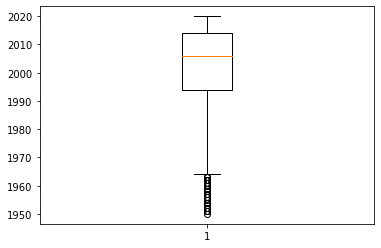

In [16]:
plt.boxplot(pd.to_numeric(data.Released))

In [17]:
data.head()

,GameTittle,Genre,Platforms,Published by,Released,Developed by,Gameplay,Perspective
5,Dead Space: Super Bundle,Compilation,PlayStation 3,"Electronic Arts, Inc.",2012,Unknown,Unknown,Unknown
7,Dead Space: Ultimate Edition,Compilation,PlayStation 3,"Electronic Arts, Inc.",2012,Unknown,Unknown,Unknown
8,Dead Star,"Action, Strategy / tactics","PlayStation 4, Windows",Armature Studio,2016,Armature Studio,Shooter,Top-down
9,Dead State,"Role-Playing (RPG), Strategy / tactics",Windows,DoubleBear Productions,2014,DoubleBear Productions,Unknown,Bird's-eye view
10,Dead State: Reanimated,"Role-Playing (RPG), Strategy / tactics",Windows,DoubleBear Productions,2015,DoubleBear Productions,Unknown,Bird's-eye view


In [18]:
lst_col = 'Platforms'
data = data.assign(**{lst_col:data[lst_col].str.split(',')})

In [19]:
data = pd.DataFrame({
          col:np.repeat(data[col].values, data[lst_col].str.len())
          for col in data.columns.difference([lst_col])
}).assign(**{lst_col:np.concatenate(data[lst_col].values)})[data.columns.tolist()]

In [20]:
data = data.rename(columns={"Platforms": "Platform"})
data.head()

,GameTittle,Genre,Platform,Published by,Released,Developed by,Gameplay,Perspective
0,Dead Space: Super Bundle,Compilation,PlayStation 3,"Electronic Arts, Inc.",2012,Unknown,Unknown,Unknown
1,Dead Space: Ultimate Edition,Compilation,PlayStation 3,"Electronic Arts, Inc.",2012,Unknown,Unknown,Unknown
2,Dead Star,"Action, Strategy / tactics",PlayStation 4,Armature Studio,2016,Armature Studio,Shooter,Top-down
3,Dead Star,"Action, Strategy / tactics",Windows,Armature Studio,2016,Armature Studio,Shooter,Top-down
4,Dead State,"Role-Playing (RPG), Strategy / tactics",Windows,DoubleBear Productions,2014,DoubleBear Productions,Unknown,Bird's-eye view


In [21]:
data.shape

(180672, 8)

In [22]:
data.Platform  = data.Platform.apply(lambda x: x.strip())
data.Released = pd.to_numeric(data.Released)
data.to_csv ('gamesDataSet_final.csv', index = False, header=True)   

In [ ]:
####ANÀLISI

In [58]:
platformList = data.Platform.value_counts()
platformList = platformList[platformList > 1000]
print(platformList)
platformList = platformList[platformList > 1000].index.tolist()
data2 = data[data.Platform.isin(platformList)]

Windows            36310
Macintosh          11902
iPhone              7901
iPad                7416
DOS                 7088
Android             6673
PlayStation 4       6086
Linux               5023
PlayStation 3       4996
Commodore 64        4848
Xbox One            4073
Nintendo Switch     3823
Xbox 360            3819
Amiga               3633
ZX Spectrum         3248
PlayStation 2       3149
Browser             2837
Arcade              2628
PlayStation         2486
Wii                 2416
PS Vita             2412
Atari ST            2404
Amstrad CPC         2108
PSP                 2040
Apple II            1962
Nintendo DS         1878
Windows 3.x         1504
Nintendo 3DS        1501
Atari 8-bit         1498
Wii U               1346
NES                 1333
PC-98               1293
MSX                 1209
SNES                1174
Name: Platform, dtype: int64


In [24]:
print(data.shape)
print(data2.shape)

(180672, 8)
(154017, 8)


34


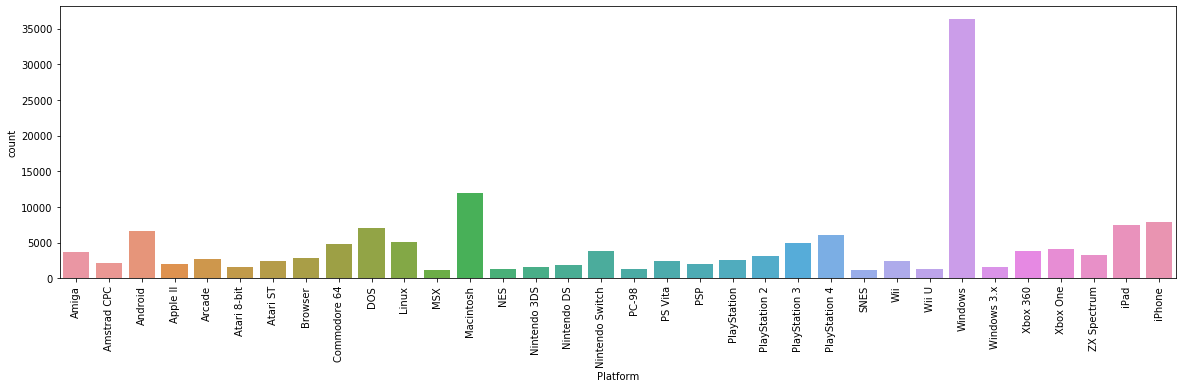

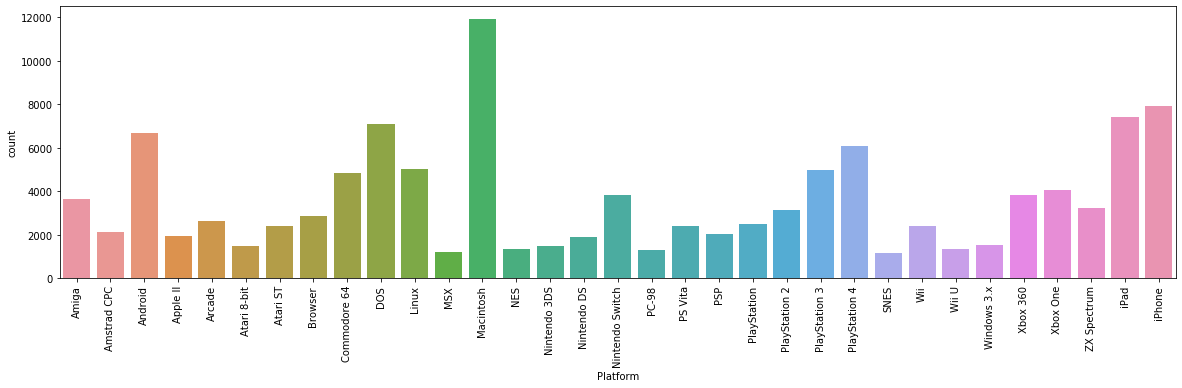

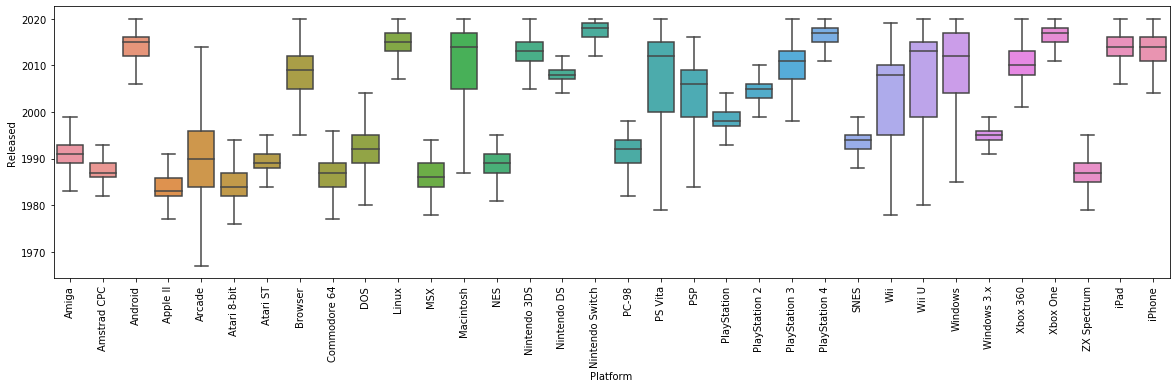

In [63]:
varName = 'Platform'

print(data2[varName].nunique())

data2 = data2.sort_values(by=varName, ascending=True)

plt.figure(figsize=(20,5))
plt.xticks(rotation='vertical')
sns.countplot(data = data2, x = varName)
plt.show()

plt.figure(figsize=(20,5))
plt.xticks(rotation='vertical')
sns.countplot(data = data2[data2.Platform != 'Windows'], x = varName)
plt.show()

plt.figure(figsize=(20,5))
plt.xticks(rotation='vertical')
sns.boxplot(data = data2, x=varName, y='Released',showfliers=False)
plt.show()

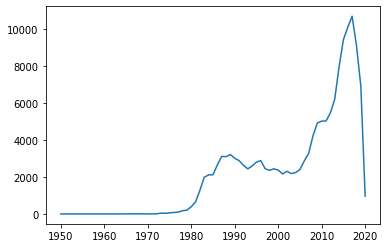

In [64]:
plt.plot(data2['Released'].value_counts().sort_index())

In [26]:
dataPlays = data2[data2.Platform.str.contains('PlayStation')]
dataPlays.Platform.value_counts()

PlayStation 4    6086
PlayStation 3    4996
PlayStation 2    3149
PlayStation      2486
Name: Platform, dtype: int64

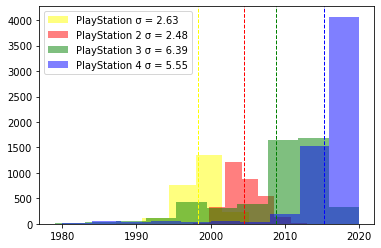

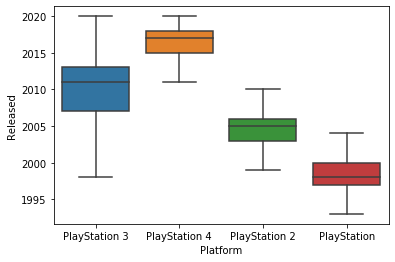

In [56]:
def createPlots ():
    plays = ['PlayStation','PlayStation 2', 'PlayStation 3','PlayStation 4']
    colors = ['yellow', 'red', 'green','blue']
    colorIndex = 0

    for target in plays:
        x = dataPlays[dataPlays['Platform']==target].Released
        legend = target
        legend = '%s σ = %s' % (target, round(x.std(),2))
        plt.hist(x, facecolor=colors[colorIndex], alpha=0.5, label = legend)
        plt.axvline(x.mean(), color=colors[colorIndex], linestyle='dashed', linewidth=1)
        colorIndex=(colorIndex+1) % 4
    plt.legend()
    plt.show()

    sns.boxplot(data = dataPlays, x=varName, y='Released',showfliers=False)
    
createPlaystationPlots()

In [49]:
dataNintendos = data2[data2.Platform.str.contains('Nintendo')]
dataNintendos.Platform.value_counts()

Nintendo Switch    3823
Nintendo DS        1878
Nintendo 3DS       1501
Name: Platform, dtype: int64

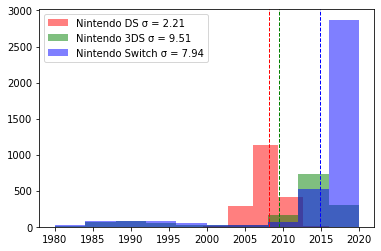

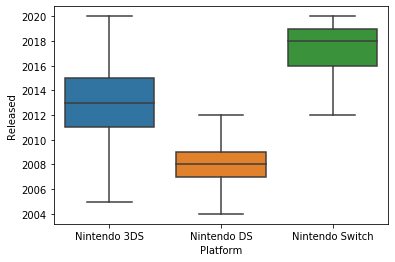

In [55]:
def createNintendoPlots ():
    plays = ['Nintendo DS','Nintendo 3DS', 'Nintendo Switch']
    colors = ['red', 'green','blue']
    colorIndex = 0

    for target in plays:
        x = dataNintendos[dataNintendos['Platform']==target].Released
        legend = target
        legend = '%s σ = %s' % (target, round(x.std(),2))
        plt.hist(x, facecolor=colors[colorIndex], alpha=0.5, label = legend)
        plt.axvline(x.mean(), color=colors[colorIndex], linestyle='dashed', linewidth=1)
        colorIndex=(colorIndex+1) % 3
    plt.legend()
    plt.show()

    sns.boxplot(data = dataNintendos, x=varName, y='Released',showfliers=False)
    
createNintendoPlots()